In [1]:
import pandas as pd

In [2]:
set = pd.read_csv('online_retail_analysis.csv')

In [3]:
set.head()

index  InvoiceNo StockCode                          Description  Quantity  \
0      0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1     536365     71053                  WHITE METAL LANTERN         6   
2      2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   Day      Time  Revenue  
0    1  08:26:00    15.30  
1    1  08:26:00    20.34  
2    1  08:26:00    22.00  
3    1  08:26:00    20.34  
4    1  08:26:00    20.34

In [4]:
set.shape

(397924, 14)

In [5]:
set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        397924 non-null  int64  
 1   InvoiceNo    397924 non-null  int64  
 2   StockCode    397924 non-null  object 
 3   Description  397924 non-null  object 
 4   Quantity     397924 non-null  int64  
 5   InvoiceDate  397924 non-null  object 
 6   UnitPrice    397924 non-null  float64
 7   CustomerID   397924 non-null  float64
 8   Country      397924 non-null  object 
 9   Year         397924 non-null  int64  
 10  Month        397924 non-null  int64  
 11  Day          397924 non-null  int64  
 12  Time         397924 non-null  object 
 13  Revenue      397924 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 42.5+ MB


# RFM Analysis

### The maximum date as the latest date and calculate the Recency, Frequency and Monetary for the customers.

In [6]:
set = set.copy()  # Create an independent copy
set['date'] = pd.to_datetime(set[['Year', 'Month', 'Day']])

In [7]:
set.head()

index  InvoiceNo StockCode                          Description  Quantity  \
0      0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1     536365     71053                  WHITE METAL LANTERN         6   
2      2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   Day      Time  Revenue       date  
0    1  08:26:00    15.30 2010-12-01  
1    1  08:26:00    20.34 2010-12-01  
2    1  08:26:00    22.00 2010-12-01  
3    1  08:26:00    20.34 2010-12-01  
4    1  08:26:00    20.34 2010-12-01

# Calculate RFM Metrics

In [8]:
# Calculate the latest date in the dataset and add one day
latest_date = set['date'].max() + pd.Timedelta(days=1)

# Calculate RFM values
rfm = set.groupby('CustomerID').agg(
    Recency=('date', lambda x: (latest_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Revenue', 'sum')
).reset_index()

# Display the first few rows of the RFM DataFrame
rfm.head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        3          7   4310.00
2     12348.0       76          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      311          1    334.40

# Assign RFM Scores
### Each customer gets a score (1-5) for Recency, Frequency, and Monetary values.

In [9]:
# Calculate Recency, Frequency, and Monetary scores using pd.qcut
rfm["Recency_score"] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm["Monetary_score"] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# Display the first few rows of the RFM DataFrame
rfm.head()

CustomerID  Recency  Frequency  Monetary Recency_score Frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12347.0        3          7   4310.00             5               5   
2     12348.0       76          4   1797.24             2               4   
3     12349.0       19          1   1757.55             4               1   
4     12350.0      311          1    334.40             1               1   

  Monetary_score  
0              5  
1              5  
2              4  
3              4  
4              2

In [10]:
# Combine Recency, Frequency, and Monetary scores into a single RFM score
rfm["RFM_Score"] = (
    rfm['Recency_score'].astype(str) + 
    rfm['Frequency_score'].astype(str) + 
    rfm['Monetary_score'].astype(str)
)

# Display the first few rows of the RFM DataFrame
rfm.head()

CustomerID  Recency  Frequency  Monetary Recency_score Frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12347.0        3          7   4310.00             5               5   
2     12348.0       76          4   1797.24             2               4   
3     12349.0       19          1   1757.55             4               1   
4     12350.0      311          1    334.40             1               1   

  Monetary_score RFM_Score  
0              5       115  
1              5       555  
2              4       244  
3              4       414  
4              2       112

# Customer Segmentation
### Using RFM scores, we define customer categories.

### Since the above predefined segments do not cover all possible patterns among customers we can use a Fallback segment and name it other, those customers can be further investigated with more details if needed.

In [11]:
# Define segments
def segment_customer(row):
    if row["RFM_Score"] in ["555", "554", "544", "545"]:
        return "Best Customers"
    elif row["RFM_Score"][0] == "5":
        return "Loyal Customers"
    elif row["RFM_Score"][1] == "5":
        return "Frequent Buyers"
    elif row["RFM_Score"] in ["111", "112", "121"]:
        return "Lost Customers"
    elif row["RFM_Score"][0] == "1":
        return "Churn Risk"
    else:
        return "Others"

rfm["Customer_Segment"] = rfm.apply(segment_customer, axis=1)

# Display segmentation results
print(rfm["Customer_Segment"].value_counts())


Customer_Segment
Others             2192
Best Customers      557
Lost Customers      462
Frequent Buyers     429
Churn Risk          388
Loyal Customers     311
Name: count, dtype: int64


In [12]:
rfm.head()

CustomerID  Recency  Frequency  Monetary Recency_score Frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12347.0        3          7   4310.00             5               5   
2     12348.0       76          4   1797.24             2               4   
3     12349.0       19          1   1757.55             4               1   
4     12350.0      311          1    334.40             1               1   

  Monetary_score RFM_Score Customer_Segment  
0              5       115       Churn Risk  
1              5       555   Best Customers  
2              4       244           Others  
3              4       414           Others  
4              2       112   Lost Customers

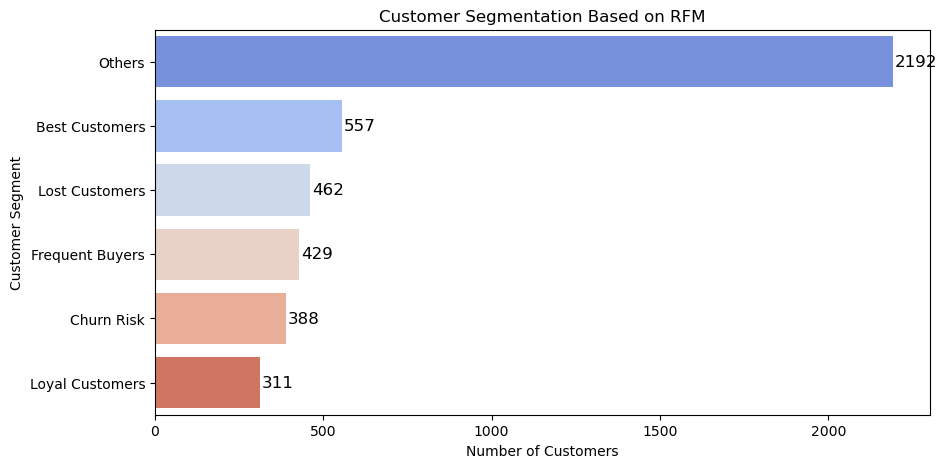

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rfm is a DataFrame and "Customer_Segment" is a column in it
plt.figure(figsize=(10, 5))
ax = sns.countplot(y=rfm["Customer_Segment"], order=rfm["Customer_Segment"].value_counts().index, palette="coolwarm")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Segment")
plt.title("Customer Segmentation Based on RFM")

# Adding text labels on top of each bar
for p in ax.patches:
    width = p.get_width()  # Get the width of each bar (number of customers)
    ax.text(width + 5,  # x-position: width of the bar + small offset
            p.get_y() + p.get_height() / 2,  # y-position: middle of the bar
            f"{int(width)}",  # Text to display (number of customers)
            ha='left', va='center', fontsize=12)

plt.show()

## Customer Count by Recency Category

In [14]:
rec_bins = [0,30,60,120,240,float('inf')]
rec_labels = ['0 Days - Month','31 Days - 2 Months', '61 Days - 4 Months','121 Days - 8 Months', 'More than 240 Days']
rfm['rec_category'] = pd.cut(rfm['Recency'], bins=rec_bins, labels=rec_labels)

recency_counts = rfm['rec_category'].value_counts().sort_index()
recency_counts

rec_category
0 Days - Month         1629
31 Days - 2 Months      748
61 Days - 4 Months      742
121 Days - 8 Months     667
More than 240 Days      553
Name: count, dtype: int64

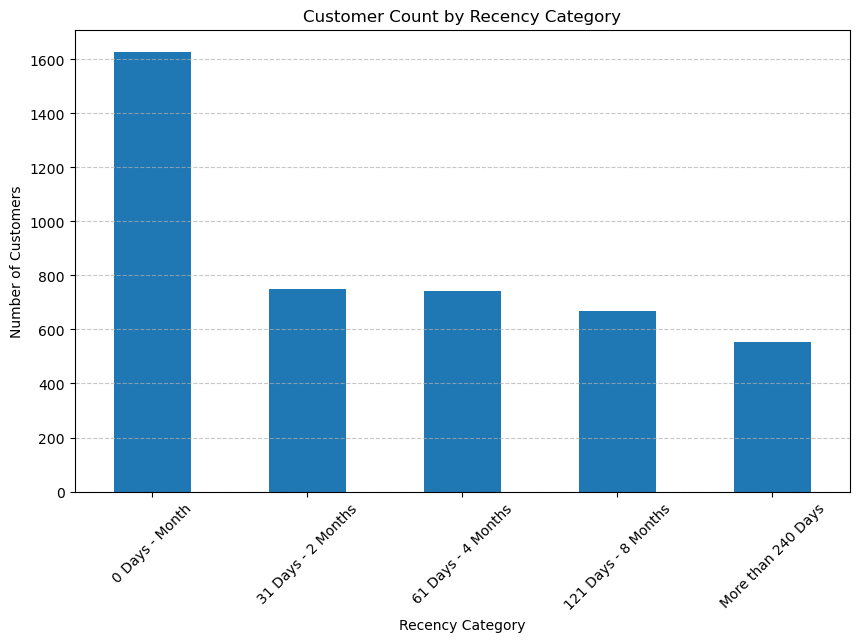

In [15]:
plt.figure(figsize=(10, 6))
recency_counts.plot(kind='bar')
plt.title('Customer Count by Recency Category')
plt.xlabel('Recency Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Customer Count by Frequency Category

In [16]:
freq_bins = [0,1,5,10,20,float('inf')]
freq_labels = ['1 Purchase','2-5 Purchases','6-10 Purchases', '11-20 Purchases','Over 20 Purchases']
rfm['freq_category'] = pd.cut(rfm['Frequency'], bins=freq_bins, labels=freq_labels)

frequency_counts = rfm['freq_category'].value_counts().sort_index()
frequency_counts

freq_category
1 Purchase           1494
2-5 Purchases        1973
6-10 Purchases        535
11-20 Purchases       242
Over 20 Purchases      95
Name: count, dtype: int64

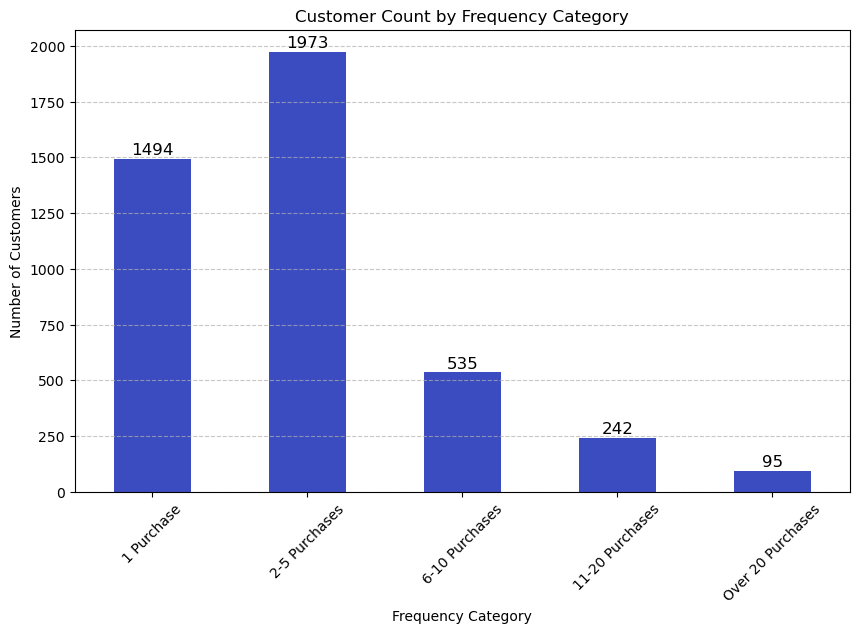

In [17]:
# Assuming frequency_counts is a pandas Series
plt.figure(figsize=(10, 6))
ax = frequency_counts.plot(kind='bar', colormap="coolwarm")
plt.title('Customer Count by Frequency Category')
plt.xlabel('Frequency Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on top of each bar
for i, value in enumerate(frequency_counts):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=12)

plt.show()

## Customer Count by Monetary Category

In [18]:
mon_bins = [0,500,2000,5000,10000,float('inf')]
mon_labels = ['0 - 500 $','500 - 2000 $','2000 - 5000 $', '5000 - 10,000 $','Over 10,000 $']
rfm['Mon_category'] = pd.cut(rfm['Monetary'], bins=mon_bins, labels=mon_labels)

Monetary_counts = rfm['Mon_category'].value_counts().sort_index()
Monetary_counts

Mon_category
0 - 500 $          1762
500 - 2000 $       1673
2000 - 5000 $       628
5000 - 10,000 $     171
Over 10,000 $       104
Name: count, dtype: int64

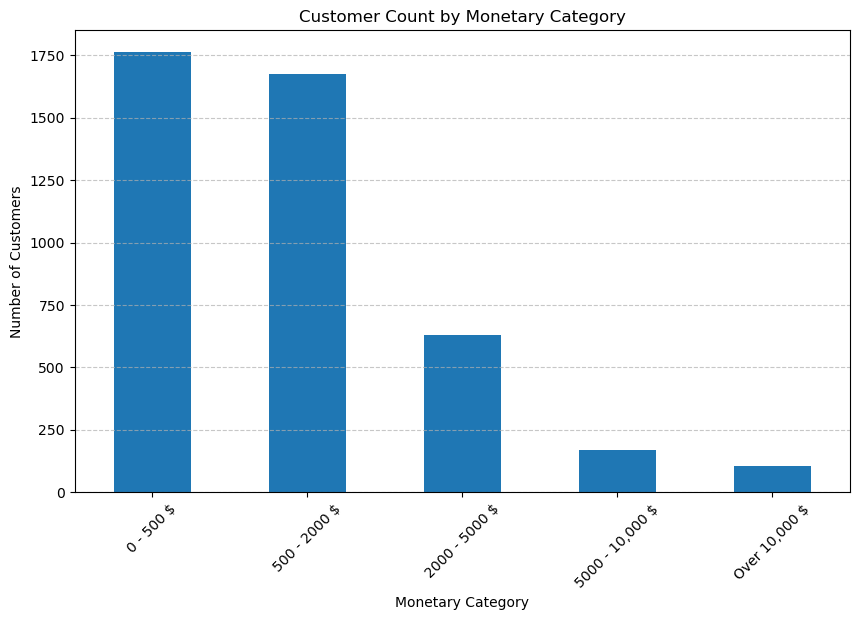

In [19]:
plt.figure(figsize=(10, 6))
Monetary_counts.plot(kind='bar')
plt.title('Customer Count by Monetary Category')
plt.xlabel('Monetary Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
rfm.head()

CustomerID  Recency  Frequency  Monetary Recency_score Frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12347.0        3          7   4310.00             5               5   
2     12348.0       76          4   1797.24             2               4   
3     12349.0       19          1   1757.55             4               1   
4     12350.0      311          1    334.40             1               1   

  Monetary_score RFM_Score Customer_Segment        rec_category  \
0              5       115       Churn Risk  More than 240 Days   
1              5       555   Best Customers      0 Days - Month   
2              4       244           Others  61 Days - 4 Months   
3              4       414           Others      0 Days - Month   
4              2       112   Lost Customers  More than 240 Days   

    freq_category   Mon_category  
0      1 Purchase  Over 10,000 $  
1  6-10 Purchases  2000 - 5000 $  
2   2-5 Purchases   500 - 2000 $  
3      1 Purchase   500 - 2000 $  
4      1 Purchase      0 - 500 $

# Building a Predictive Model for Customer Segmentation

In [21]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()   # Encode customer segments into numerical values
rfm["Segment_Label"] = label_encoder.fit_transform(rfm["Customer_Segment"])

In [22]:
rfm.head()

CustomerID  Recency  Frequency  Monetary Recency_score Frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12347.0        3          7   4310.00             5               5   
2     12348.0       76          4   1797.24             2               4   
3     12349.0       19          1   1757.55             4               1   
4     12350.0      311          1    334.40             1               1   

  Monetary_score RFM_Score Customer_Segment        rec_category  \
0              5       115       Churn Risk  More than 240 Days   
1              5       555   Best Customers      0 Days - Month   
2              4       244           Others  61 Days - 4 Months   
3              4       414           Others      0 Days - Month   
4              2       112   Lost Customers  More than 240 Days   

    freq_category   Mon_category  Segment_Label  
0      1 Purchase  Over 10,000 $              1  
1  6-10 Purchases  2000 - 5000 $              0  
2   2-5 Purchases   500 - 2000 $              5  
3      1 Purchase   500 - 2000 $              5  
4      1 Purchase      0 - 500 $              3

In [59]:
rfm.to_csv('customer_segmentation.csv')

In [23]:
x = rfm[["Recency", "Frequency", "Monetary"]]  # Select features (RFM values) and target (Segment Label)
y = rfm["Segment_Label"]

In [24]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Split data into training (80%) and testing (20%)

# Train Classification Models
### We will try Decision Tree, Random Forest and XGBoost.

In [25]:
from sklearn.tree import DecisionTreeClassifier


# Train Decision Tree model
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred = dtc_model.predict(x_test)  # Predict on test data

In [27]:
y_pred

array([5, 5, 5, 0, 5, 2, 1, 3, 3, 3, 0, 2, 5, 5, 2, 3, 1, 5, 1, 4, 0, 5,
       5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 5, 3, 0, 5, 5, 5, 3, 0, 0, 3, 2, 2,
       5, 5, 4, 5, 0, 5, 0, 5, 5, 5, 0, 4, 5, 2, 4, 0, 5, 2, 5, 5, 1, 1,
       5, 2, 1, 5, 4, 0, 5, 3, 0, 1, 5, 0, 3, 5, 3, 5, 5, 3, 5, 2, 5, 4,
       5, 5, 1, 1, 0, 5, 0, 5, 5, 5, 5, 4, 2, 5, 3, 2, 5, 1, 5, 5, 2, 3,
       5, 5, 5, 5, 5, 5, 5, 0, 1, 5, 2, 5, 0, 0, 5, 5, 4, 5, 5, 3, 5, 5,
       3, 0, 5, 5, 5, 5, 0, 0, 5, 3, 5, 5, 1, 5, 5, 2, 2, 2, 2, 5, 4, 0,
       5, 3, 5, 2, 5, 5, 5, 4, 5, 5, 0, 2, 4, 5, 0, 0, 5, 5, 5, 5, 5, 1,
       1, 5, 5, 0, 3, 5, 5, 4, 5, 5, 4, 5, 0, 5, 5, 5, 5, 5, 5, 3, 4, 0,
       1, 1, 2, 0, 3, 5, 5, 5, 5, 1, 5, 0, 3, 2, 5, 5, 5, 4, 5, 4, 5, 5,
       5, 2, 3, 5, 5, 0, 5, 5, 5, 5, 3, 5, 5, 0, 3, 0, 0, 0, 3, 0, 2, 5,
       5, 4, 3, 5, 5, 0, 3, 1, 5, 5, 3, 0, 3, 2, 3, 5, 3, 5, 5, 5, 5, 5,
       3, 2, 3, 5, 5, 2, 4, 5, 5, 5, 5, 5, 3, 0, 5, 5, 5, 5, 0, 5, 4, 5,
       3, 2, 3, 1, 5, 0, 4, 5, 5, 5, 4, 3, 5, 1, 1,

In [28]:
import numpy as np

np.array(y_test)

array([5, 5, 5, 0, 5, 2, 3, 3, 3, 3, 0, 2, 5, 5, 2, 3, 1, 5, 1, 4, 0, 5,
       5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 5, 3, 0, 5, 5, 5, 3, 0, 0, 3, 2, 2,
       5, 5, 4, 5, 0, 5, 0, 5, 5, 5, 0, 4, 5, 2, 4, 0, 5, 2, 5, 5, 1, 1,
       5, 2, 1, 5, 4, 0, 5, 3, 0, 1, 5, 0, 3, 5, 3, 5, 5, 3, 5, 2, 5, 0,
       5, 5, 1, 1, 0, 5, 0, 5, 5, 5, 5, 0, 2, 5, 3, 2, 5, 1, 5, 5, 2, 3,
       5, 5, 5, 5, 5, 5, 5, 0, 1, 5, 2, 5, 0, 0, 5, 5, 4, 5, 5, 3, 5, 5,
       3, 0, 5, 5, 5, 5, 0, 0, 5, 1, 5, 5, 3, 5, 5, 2, 2, 2, 2, 5, 4, 0,
       5, 3, 5, 2, 5, 5, 5, 4, 5, 5, 0, 2, 4, 5, 0, 0, 5, 5, 5, 5, 5, 1,
       1, 5, 5, 0, 3, 5, 5, 4, 5, 5, 4, 5, 0, 5, 5, 5, 5, 5, 5, 3, 4, 0,
       3, 1, 2, 0, 3, 5, 5, 5, 5, 1, 5, 0, 3, 2, 5, 5, 5, 4, 5, 4, 5, 5,
       5, 2, 3, 5, 5, 0, 5, 5, 5, 5, 1, 5, 5, 0, 3, 0, 0, 0, 3, 0, 2, 5,
       5, 4, 3, 5, 5, 0, 3, 1, 5, 5, 3, 0, 3, 2, 3, 5, 3, 5, 5, 5, 5, 5,
       3, 2, 3, 5, 5, 2, 4, 5, 5, 5, 5, 5, 3, 0, 5, 5, 5, 5, 0, 5, 4, 5,
       3, 2, 3, 1, 5, 0, 4, 5, 5, 5, 4, 3, 5, 1, 1,

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)

In [30]:
accuracy

0.9735023041474654

In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_pred, y_test)

In [32]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       123
           1       0.84      0.90      0.87        68
           2       0.99      1.00      0.99        91
           3       0.92      0.88      0.90        97
           4       0.98      0.96      0.97        55
           5       1.00      1.00      1.00       434

    accuracy                           0.97       868
   macro avg       0.95      0.95      0.95       868
weighted avg       0.97      0.97      0.97       868



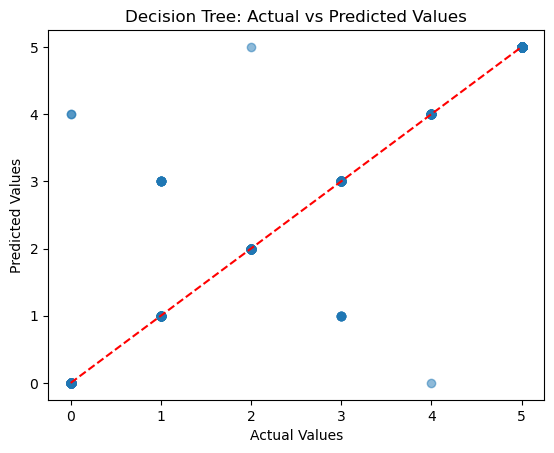

In [56]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Predict on test data
rfc_pred = rfc_model.predict(x_test)

In [35]:
accuracy_rfc = accuracy_score(rfc_pred, y_test)

In [36]:
accuracy_rfc

0.9746543778801844

In [37]:
report_rfc = classification_report(rfc_pred, y_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       0.81      0.91      0.86        65
           2       1.00      1.00      1.00        92
           3       0.93      0.86      0.90       100
           4       1.00      0.96      0.98        56
           5       1.00      1.00      1.00       433

    accuracy                           0.97       868
   macro avg       0.95      0.96      0.95       868
weighted avg       0.98      0.97      0.97       868



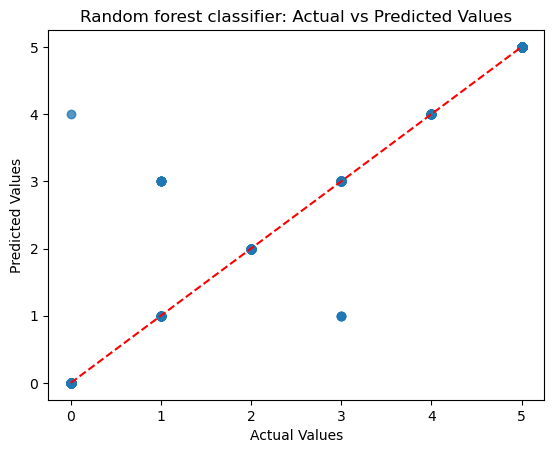

In [57]:
plt.scatter(y_test, rfc_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random forest classifier: Actual vs Predicted Values')
plt.show()

In [38]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric="mlogloss")
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
pred_xgb = xgb_model.predict(x_test)

In [40]:
accuracy_xgb = accuracy_score(pred_xgb, y_test)

In [41]:
accuracy_xgb

0.9735023041474654

In [42]:
report_xgb = classification_report(pred_xgb, y_test)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.84      0.91      0.87        67
           2       0.99      1.00      0.99        91
           3       0.95      0.86      0.90       101
           4       0.98      0.98      0.98        54
           5       0.99      1.00      1.00       431

    accuracy                           0.97       868
   macro avg       0.96      0.96      0.96       868
weighted avg       0.97      0.97      0.97       868



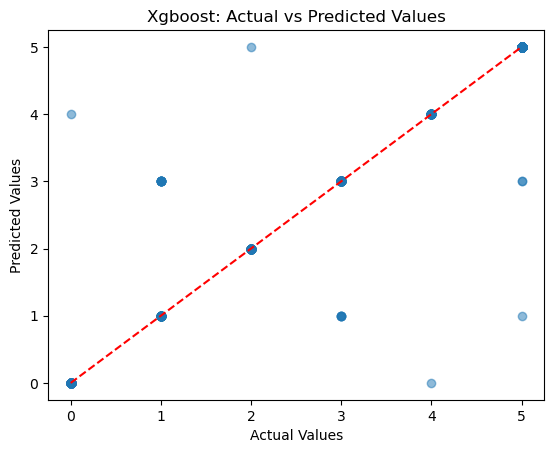

In [58]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y = x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Xgboost: Actual vs Predicted Values')
plt.show()

In [43]:
import warnings

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

## Compare Model Performance

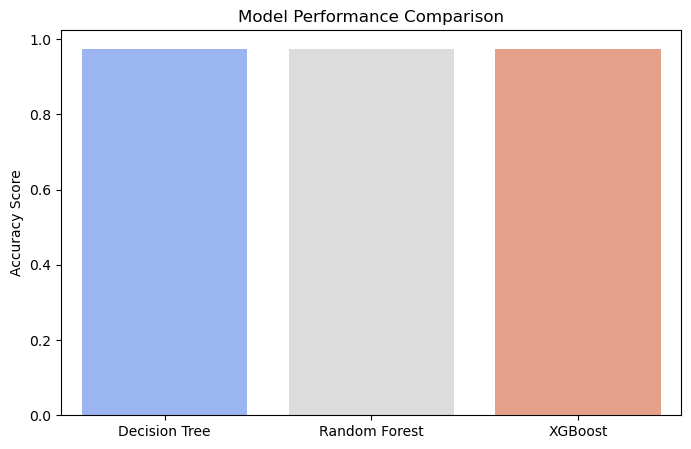

In [44]:
models = ["Decision Tree", "Random Forest", "XGBoost"]
accuracies = [accuracy_score(y_pred, y_test), accuracy_score(rfc_pred, y_test), accuracy_score(pred_xgb, y_test)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()


In [45]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [46]:
# Example: Predict segment for a new customer
new_customer = np.array([[30, 5, 500]])  # Example Recency: 30 days, Frequency: 5, Monetary: $500
predicted_segment = rfc_model.predict(new_customer)
segment_name = label_encoder.inverse_transform(predicted_segment)

print("Predicted Customer Segment:", segment_name[0])


Predicted Customer Segment: Others


In [47]:
import joblib

# Save the best model (Random Forest)
joblib.dump(rfc_model, "customer_segmentation_model.pkl")

['customer_segmentation_model.pkl']

In [48]:
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [49]:
x.describe()

Recency    Frequency       Monetary
count  4339.000000  4339.000000    4339.000000
mean     93.041484     4.271952    2053.793018
std     100.007757     7.705493    8988.248381
min       1.000000     1.000000       0.000000
25%      18.000000     1.000000     307.245000
50%      51.000000     2.000000     674.450000
75%     142.500000     5.000000    1661.640000
max     374.000000   210.000000  280206.020000